Import the libs & Data

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('data/workout_history_cleaned.csv')
print(df.head())
print(df.info())

   day    month  year            class_name  \
0   13  January  2025      Fighting Mastery   
1   13  January  2025  Fighting Foundations   
2   11  January  2025              Sparring   
3    8  January  2025      Fighting Mastery   
4    8  January  2025  Fighting Foundations   

                                  location time_of_day  duration  
0  Cantu's Self-Defense, LLC. w/ Roy Cantu     12:30pm        30  
1  Cantu's Self-Defense, LLC. w/ Roy Cantu     11:30am        60  
2  Cantu's Self-Defense, LLC. w/ Roy Cantu     11:00am        60  
3  Cantu's Self-Defense, LLC. w/ Roy Cantu     12:30pm        30  
4  Cantu's Self-Defense, LLC. w/ Roy Cantu     11:30am        60  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          1238 non-null   int64 
 1   month        1238 non-null   object
 2   year         1238 non-null   int64 
 3  

In [22]:
class_counts = df['class_name'].value_counts()
print("Class Frequencies:\n", class_counts)
print("###################################################")
locations = df['location'].value_counts()
print("Location Frequencies:\n", locations)

Class Frequencies:
 class_name
Fighting Foundations               511
Sparring                           273
BLUE ADULT                         202
Fighting Mastery                   117
Adult Fundamentals                  32
Adult Spar                          20
Ollin Boot Camp                     18
Fighting Foundations Online         12
Fighting Mastery Online              9
Striking and Clinching               7
Adults Advanced                      5
Adults Online Class                  1
Valente Brothers Seminar Adults      1
Fighting Mastery™                    1
Online Advanced                      1
Fighting Foundations™                1
Boot Camp                            1
Adult VB Seminar                     1
Name: count, dtype: int64
###################################################
Location Frequencies:
 location
Cantu's Self-Defense, LLC. w/ Roy Cantu                        967
Cypress Pro Medical Group w/ Scheduled Coach                   161
Cypress Pro Medical Gro

In [23]:
# Class Name & Location Cleanup
def standardize_class_name(class_name):
    class_name = class_name.strip()
    replacements = {
        "Fighting Foundations": "Fighting Foundations",
        "Fighting Mastery": "Fighting Mastery",
        "Sparring": "Sparring",
        "Ollin Boot Camp": "Boot Camp",
        "Adult Fundamentals": "Fighting Foundations",
        "Adult Spar": "Sparring",
        "Adults Advanced": "Fighting Mastery",
        "Online Advanced": "Fighting Mastery Online",
        "Adult VB Seminar": "Valente Brothers Seminar Adults",
        "Fighting Mastery™": "Fighting Mastery",
        "Online Advanced": "Fighting Mastery Online",
        "Fighting Foundations™": "Fighting Foundations",
        "BLUE ADULT": "Boot Camp",
        "Adults Online Class": "Fighting Foundations Online",
        
    }
    return replacements.get(class_name, class_name)


df['class_name'] = df['class_name'].apply(standardize_class_name)

#df['class_name'] = df['class_name'].apply()

class_counts = df['class_name'].value_counts()
print("Class Frequencies:\n", class_counts)
print("###################################################")
locations = df['location'].value_counts()
print("Location Frequencies:\n", locations)

AttributeError: 'float' object has no attribute 'strip'

Class Frequencies:
 class_name
Fighting Foundations               511
Sparring                           273
BLUE ADULT                         202
Fighting Mastery                   117
Adult Fundamentals                  32
Adult Spar                          20
Ollin Boot Camp                     18
Fighting Foundations Online         12
Fighting Mastery Online              9
Striking and Clinching               7
Adults Advanced                      5
Adults Online Class                  1
Valente Brothers Seminar Adults      1
Fighting Mastery™                    1
Online Advanced                      1
Fighting Foundations™                1
Boot Camp                            1
Adult VB Seminar                     1
Name: count, dtype: int64


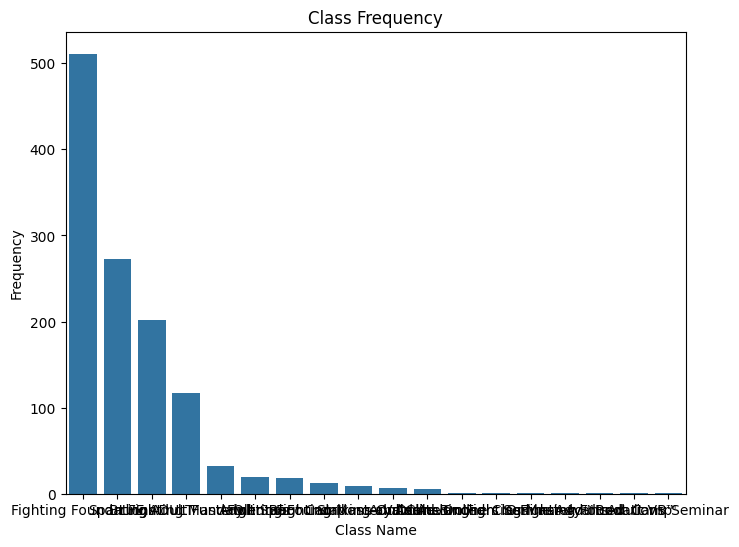

In [8]:
# Class Frequency Analysis
class_counts = df['class_name'].value_counts()
print("Class Frequencies:\n", class_counts)

plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Frequency')
plt.xlabel('Class Name')
plt.ylabel('Frequency')
plt.show()

In [19]:
# Class Name & Location Cleanup
def clean_class_name(class_name):
    class_name = class_name.strip()
    replacements = {
        "Fighting Foundations": "Fighting Foundations",
        "Fighting Mastery": "Fighting Mastery",
        "Sparring": "Sparring",
        "Boot Camp": "Boot Camp",
        "Adult Fundamentals": "Fighting Foundations",
        "Adult Spar": "Sparring",
        "Adults Advanced": "Fighting Mastery",
        "Online Advanced": "Fighting Mastery Online",
    }
    return replacements.get(class_name, class_name)



#df['class_name'] = df['class_name'].apply()

class_counts = df['class_name'].value_counts()
print("Class Frequencies:\n", class_counts)
print("###################################################")
locations = df['location'].value_counts()
print("Location Frequencies:\n", locations)

Class Frequencies:
 class_name
Fighting Foundations               512
Sparring                           273
Boot Camp                          221
Fighting Mastery                   118
Adult Fundamentals                  32
Adult Spar                          20
Fighting Foundations Online         12
Fighting Mastery Online              9
Striking and Clinching               7
Adults Advanced                      5
Valente Brothers Seminar Adults      2
Online Advanced                      1
Adults Online Class                  1
Name: count, dtype: int64
###################################################
Location Frequencies:
 location
Cantu's Self-Defense, LLC. w/ Roy Cantu                        967
Cypress Pro Medical Group w/ Scheduled Coach                   161
Cypress Pro Medical Group w/ Scheduled  Coach                   60
Cypress Pro Medical Group w/ Minh Luu                           25
Valente Brothers Jujutsu North Miami Beach w/ Pedro Valente     23
Cantu's Self-Defe

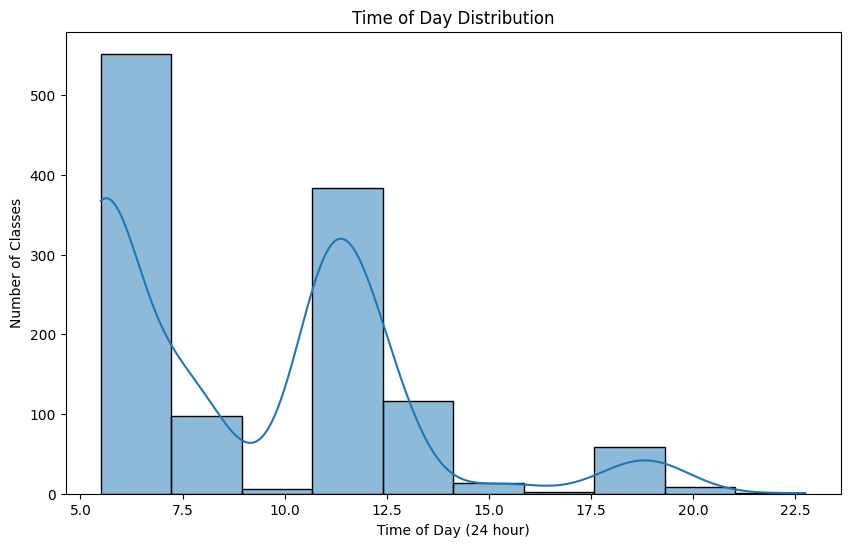

In [9]:
# Time of Day Analysis

def convert_time_to_24hr(time_str):
    time_str = time_str.lower()  # Convert to lowercase for easier processing
    if 'pm' in time_str:
        if time_str.startswith('12'): #handle noon as a special case
             hour = 12
        else:
          hour = int(time_str.split(':')[0]) + 12
    else:
        hour = int(time_str.split(':')[0])
    minute = int(time_str.split(':')[1][:2])
    return hour + minute/60

df['time_of_day_24hr'] = df['time_of_day'].apply(convert_time_to_24hr)

plt.figure(figsize=(10, 6))
sns.histplot(df['time_of_day_24hr'], bins=10, kde=True)
plt.title('Time of Day Distribution')
plt.xlabel('Time of Day (24 hour)')
plt.ylabel('Number of Classes')
plt.show()

Duration Statistics:
 count    1238.000000
mean       60.521002
std        19.653197
min        30.000000
25%        60.000000
50%        60.000000
75%        60.000000
max       300.000000
Name: duration, dtype: float64


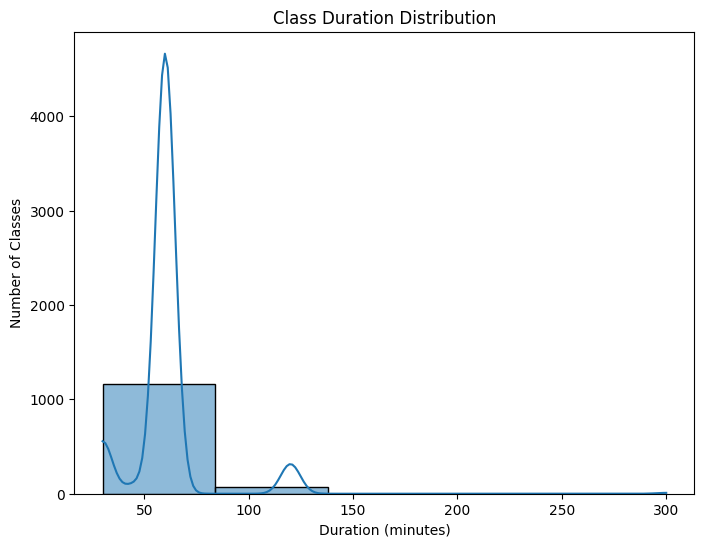

In [10]:
# Duration Analysis
duration_stats = df['duration'].describe()
print("Duration Statistics:\n", duration_stats)

plt.figure(figsize=(8, 6))
sns.histplot(df['duration'], bins=5, kde=True)
plt.title('Class Duration Distribution')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Classes')
plt.show()